<a href="https://colab.research.google.com/github/andersonjhones/An-lise-de-dados/blob/main/Dados_alunos_2015a2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Visão geral do conjunto de dados:**

Esses dados são sobre características dos alunos da rede da prefeitura que contém dois datasets: 
* tb_aluno_2015_2020_anonimizado, com 2417671 linhas e 19 colunas;
* tb_notas_2015_2020_anonimizado, com 34185100 linhas e 9 colunas.

**Dicionário dos dados:**

* **tb_aluno_2015_2020_anonimizado**

1. **nr_anoletivo:** ano letivo de 2015 a 2020	
2. **id_crede_sefor	**: ID da CREDE;
3. **nm_crede_sefor**: qual a CREDE da escola;
4. **id_municipio**: ID do município;
5. **nm_municipio**: município da escola;
6. **id_escola**: ID da escola;	
7. **nm_escola**: nome da escola;
8. **nm_categoria**: categoria do ensino (profissionalizante, de tempo integral, ou regular)
9. **ds_modalidade**: modalidade de ensino (regular, profissional...)
10. **ds_nivel**: nível de educação;
11. **ci_turma**: código da turma;
12. **ds_etapa**: série que o aluno está cursando;	
13. **ds_turma**: turma do aluno;
14. **ds_turno**: turno que o aluno estuda;
15. **nm_curso**: o curso que o aluno está fazendo (tem "não se aplica" e cursos técnicos);
16. **cd_aluno**: código do aluno (para anonimato do mesmo);	
17. **dt_nascimento**: data de nascimento do aluno;	
18. **ds_sexo**: sexo do aluno;
19. **ds_raca**: raça do aluno.







In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados_alunos = pd.read_csv('/content/drive/MyDrive/t_ia/tb_aluno_2015_2020_anonimizado.csv', sep=';')


**Quantidade de linhas e colunas**

In [ ]:
dados_alunos.shape

(2417671, 19)

In [ ]:
dados_alunos.head()

,nr_anoletivo,id_crede_sefor,nm_crede_sefor,id_municipio,nm_municipio,id_escola,nm_escola,nm_categoria,ds_modalidade,ds_nivel,ci_turma,ds_etapa,ds_turma,ds_turno,nm_curso,cd_aluno,dt_nascimento,ds_sexo,ds_raca
0,2015,1,CREDE 1,2301000,Aquiraz,23060948,EEMTI LIA SIDOU,Tempo Integral,Regular,Ensino Médio,327724,1ª Série,A,Manhã,--- NÃO SE APLICA ---,b327d57c3a54103a63c7979f861c46cb4a214f6d,04/03/1999,Feminino,Parda
1,2015,1,CREDE 1,2301000,Aquiraz,23060948,EEMTI LIA SIDOU,Tempo Integral,Regular,Ensino Médio,327724,1ª Série,A,Manhã,--- NÃO SE APLICA ---,00d6f5760b07f95e4e7a2b2a46da51b55fd9f432,19/12/1999,Masculino,Parda
2,2015,1,CREDE 1,2301000,Aquiraz,23060948,EEMTI LIA SIDOU,Tempo Integral,Regular,Ensino Médio,327724,1ª Série,A,Manhã,--- NÃO SE APLICA ---,d553cdf580fdcbc6d9f50475d10349f21629bfa8,17/05/1999,Masculino,Parda
3,2015,1,CREDE 1,2301000,Aquiraz,23060948,EEMTI LIA SIDOU,Tempo Integral,Regular,Ensino Médio,327724,1ª Série,A,Manhã,--- NÃO SE APLICA ---,99d8b2f108857d62be66862e926f03323d3a245a,24/06/1998,Masculino,Parda
4,2015,1,CREDE 1,2301000,Aquiraz,23060948,EEMTI LIA SIDOU,Tempo Integral,Regular,Ensino Médio,327724,1ª Série,A,Manhã,--- NÃO SE APLICA ---,3e9568340f276ed8f29540321647357bdf0615e7,11/10/1999,Feminino,Parda


**Dados contidos na coluna ds_nivel (nível de educação)**





In [ ]:
dados_alunos['ds_nivel'].unique()

array(['Ensino Médio', 'Ensino Fundamental', 'Educação Infantil',
       'CREAECE', 'ENSINO FUNDAMENTAL'], dtype=object)

Identificou-se que em alguns níveis não tinhamos a certeza se o aluno reprovou ou não, pois não tinha atributos para inferir isto. Por emplo na coluna ds_nivel com o nível ENSINO FUNDAMENTAL, que comporta o EJA Presencial - Projovem Urbano e não sabemos por exemplo se quando o aluno aparece no EJA Presencial - Projovem Urbano no ano seguinte ele reprovou ou passou para outra série, pois o nome é repetido e não temos colunas que nos mostre se o aluno foi reprovado ou não.

In [ ]:
u=dados_alunos[dados_alunos['ds_nivel']=='ENSINO FUNDAMENTAL']
u['ds_etapa'].unique()

array(['EJA Presencial - Projovem Urbano'], dtype=object)

In [ ]:
u2=dados_alunos[dados_alunos['ds_nivel']=='CREAECE']
u2['ds_etapa'].unique()

array(['Deficiência Intelectual', 'Deficiência Visual',
       'Práticas Inclusivas do AEE', 'TGD/TEA', 'LIBRAS'], dtype=object)

In [ ]:
uif=dados_alunos[dados_alunos['ds_nivel']=='Educação Infantil']
uif['ds_etapa'].unique()

array(['Pré-escola (4 e 5 anos)', 'Creche (0 a 3 anos)', 'PRÉ-ESCOLA'],
      dtype=object)

Decidiu-se excluir os níveis e as etapas que não fossem possível confirmar se o aluno foi aprovado ou reprovado

In [ ]:
hh=dados_alunos[dados_alunos['ds_nivel']!='CREAECE']
hh=hh[hh['ds_nivel']!='Educação Infantil']
hh=hh[hh['ds_nivel']!='ENSINO FUNDAMENTAL']

In [ ]:
hh['ds_nivel'].unique()

array(['Ensino Médio', 'Ensino Fundamental'], dtype=object)

In [ ]:
hh['ds_etapa'].unique()

array(['1ª Série', '2ª Série', '3ª Série',
       'EJA Presencial - Ensino Médio', 'EJA Presencial - Anos finais',
       '3º ano', '5º ano', '6º ano', '8º ano', '9º ano', 'Multi',
       'Integrado 1ª Série', 'Integrado 2ª Série', 'Integrado 3ª Série',
       'EJA Presencial - Anos iniciais', '4º ano', '7º ano', '1º ano',
       '2º ano', 'EJA Semipresencial - Anos finais',
       'EJA Semipresencial - Ensino Médio',
       'Educação Infantil e Ensino Fundamental Multietapa',
       'Normal/Magistério 4ª Série', 'Normal/Magistério 2ª Série',
       'EJA Semipresencial - Anos iniciais', 'Normal/Magistério 3ª Série',
       'Formação Continuada', 'EJA Mais Qualificação Profissional I',
       'EJA Mais Qualificação Profissional II',
       'Educação Profissional (Subsequente)'], dtype=object)

In [ ]:
hh=hh[hh['ds_etapa']!='EJA Presencial - Ensino Médio']
hh=hh[hh['ds_etapa']!='EJA Presencial - Anos finais']
hh=hh[hh['ds_etapa']!='Multi']
hh=hh[hh['ds_etapa']!='EJA Presencial - Anos iniciais']
hh=hh[hh['ds_etapa']!='EJA Semipresencial - Anos finais']
hh=hh[hh['ds_etapa']!='EJA Semipresencial - Ensino Médio']
hh=hh[hh['ds_etapa']!='Educação Infantil e Ensino Fundamental Multietapa']
hh=hh[hh['ds_etapa']!='EJA Semipresencial - Anos iniciais']
hh=hh[hh['ds_etapa']!='Formação Continuada']
hh=hh[hh['ds_etapa']!='EJA Mais Qualificação Profissional I']
hh=hh[hh['ds_etapa']!='EJA Mais Qualificação Profissional II']
hh=hh[hh['ds_etapa']!='Educação Profissional (Subsequente)']

In [ ]:
hh[hh['ds_etapa']=='Educação Profissional (Subsequente)']

,nr_anoletivo,id_crede_sefor,nm_crede_sefor,id_municipio,nm_municipio,id_escola,nm_escola,nm_categoria,ds_modalidade,ds_nivel,ci_turma,ds_etapa,ds_turma,ds_turno,nm_curso,cd_aluno,dt_nascimento,ds_sexo,ds_raca


Conjunto de dados que é possível dizer se o aluno reprovou ou não

In [ ]:
hh['ds_etapa'].unique()

array(['1ª Série', '2ª Série', '3ª Série', '3º ano', '5º ano', '6º ano',
       '8º ano', '9º ano', 'Integrado 1ª Série', 'Integrado 2ª Série',
       'Integrado 3ª Série', '4º ano', '7º ano', '1º ano', '2º ano',
       'Normal/Magistério 4ª Série', 'Normal/Magistério 2ª Série',
       'Normal/Magistério 3ª Série'], dtype=object)

O Conjunto de dados foi reduzido para os níveis fundamental e médio com a esclusão de algumas etapas da coluna ds_etapa que representavam incerteza se o aluno foi aprovado ou não, como no caso já comentado do Eja.

In [ ]:
hh['ds_nivel'].unique()

array(['Ensino Médio', 'Ensino Fundamental'], dtype=object)

In [ ]:
hh.shape

**Número de linhas retiradas**

In [ ]:
2417671 - 1986711

430960

In [ ]:
hh.columns

Index(['nr_anoletivo', 'id_crede_sefor', 'nm_crede_sefor', 'id_municipio',
       'nm_municipio', 'id_escola', 'nm_escola', 'nm_categoria',
       'ds_modalidade', 'ds_nivel', 'ci_turma', 'ds_etapa', 'ds_turma',
       'ds_turno', 'nm_curso', 'cd_aluno', 'dt_nascimento', 'ds_sexo',
       'ds_raca'],
      dtype='object')

In [ ]:
hh.columns

Agrupamento dos dados por: 'nr_anoletivo', 'nm_escola', 'ds_nivel', 'ds_etapa', 'cd_aluno', 'nm_crede_sefor', 'nm_municipio', 'nm_categoria', 'ds_modalidade', 'ds_turno', 'nm_curso', 'dt_nascimento', 'ds_sexo', 'ds_raca'.





In [ ]:
bb=hh[['nr_anoletivo', 'nm_escola', 'ds_nivel', 'ds_etapa', 'cd_aluno', 'nm_crede_sefor', 'nm_municipio', 'nm_categoria', 'ds_modalidade', 'ds_turno', 'nm_curso', 'dt_nascimento', 'ds_sexo', 'ds_raca']]

In [ ]:
bb['ano'].loc[bb['nr_anoletivo']]

2015    2015
2015    2015
2015    2015
2015    2015
2015    2015
        ... 
2020    2015
2020    2015
2020    2015
2020    2015
2020    2015
Name: ano, Length: 1986712, dtype: int64

In [ ]:
bb.head()

,nr_anoletivo,nm_escola,ds_nivel,ds_etapa,cd_aluno,nm_crede_sefor,nm_municipio,nm_categoria,ds_modalidade,ds_turno,nm_curso,dt_nascimento,ds_sexo,ds_raca
0,2015,EEMTI LIA SIDOU,Ensino Médio,1ª Série,b327d57c3a54103a63c7979f861c46cb4a214f6d,CREDE 1,Aquiraz,Tempo Integral,Regular,Manhã,--- NÃO SE APLICA ---,04/03/1999,Feminino,Parda
1,2015,EEMTI LIA SIDOU,Ensino Médio,1ª Série,00d6f5760b07f95e4e7a2b2a46da51b55fd9f432,CREDE 1,Aquiraz,Tempo Integral,Regular,Manhã,--- NÃO SE APLICA ---,19/12/1999,Masculino,Parda
2,2015,EEMTI LIA SIDOU,Ensino Médio,1ª Série,d553cdf580fdcbc6d9f50475d10349f21629bfa8,CREDE 1,Aquiraz,Tempo Integral,Regular,Manhã,--- NÃO SE APLICA ---,17/05/1999,Masculino,Parda
3,2015,EEMTI LIA SIDOU,Ensino Médio,1ª Série,99d8b2f108857d62be66862e926f03323d3a245a,CREDE 1,Aquiraz,Tempo Integral,Regular,Manhã,--- NÃO SE APLICA ---,24/06/1998,Masculino,Parda
4,2015,EEMTI LIA SIDOU,Ensino Médio,1ª Série,3e9568340f276ed8f29540321647357bdf0615e7,CREDE 1,Aquiraz,Tempo Integral,Regular,Manhã,--- NÃO SE APLICA ---,11/10/1999,Feminino,Parda


In [ ]:
bb.columns

Index(['nr_anoletivo', 'nm_escola', 'ds_nivel', 'ds_etapa', 'cd_aluno',
       'nm_crede_sefor', 'nm_municipio', 'nm_categoria', 'ds_modalidade',
       'ds_turno', 'nm_curso', 'dt_nascimento', 'ds_sexo', 'ds_raca', 'ano'],
      dtype='object')

Com o agrupamento começando pelo aluno conseguimos ver quantas vezes o aluno repetiu uma série, observando ordenamento da coluna ds_etapa

In [ ]:
vs=bb.groupby(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'nm_municipio', 'nm_crede_sefor', 'nm_escola', 'ds_modalidade', 'ds_turno', 'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa', 'nr_anoletivo']).count().reset_index()

In [ ]:
vs

,cd_aluno,dt_nascimento,ds_raca,ds_sexo,nm_municipio,nm_crede_sefor,nm_escola,ds_modalidade,ds_turno,nm_categoria,ds_nivel,nm_curso,ds_etapa,nr_anoletivo
0,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2017
1,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2018
2,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2019
3,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Fundamental,--- NÃO SE APLICA ---,9º ano,2018
4,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986706,ffffec72cc97fe9d91809bfd8445d11b14c6d1d8,11/11/1996,Parda,Feminino,Pacatuba,CREDE 1,EEEP PROFESSORA LUIZA DE TEODORO VIEIRA,Profissional,Integral,Profissional,Ensino Médio,TÉCNICO EM ENFERMAGEM,Integrado 3ª Série,2016
1986707,ffffec72cc97fe9d91809bfd8445d11b14c6d1d8,11/11/1996,Parda,Feminino,Pacatuba,CREDE 1,EEEP PROFESSORA LUIZA DE TEODORO VIEIRA,Regular,Integral,Profissional,Ensino Médio,TÉCNICO EM ENFERMAGEM,Integrado 2ª Série,2015
1986708,fffffacc82ef034fc5f4da6dbfd0fe1026fbc6f7,19/02/2003,Parda,Masculino,Aracati,CREDE 10,EEM BARÃO DE ARACATI,Regular,Tarde,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2018
1986709,fffffacc82ef034fc5f4da6dbfd0fe1026fbc6f7,19/02/2003,Parda,Masculino,Aracati,CREDE 10,EEM BARÃO DE ARACATI,Regular,Tarde,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2019


In [ ]:
len(vs)

1986711

**Criando dados de aprovação ou reprovação do aluno em cada ano**

In [ ]:
status=[]
for i in range(0,1986710):
  if vs['cd_aluno'][i] == vs['cd_aluno'][i+1] and vs['ds_etapa'][i] == vs['ds_etapa'][i+1]:
    status.append(1)
  else:
    status.append(0)


In [ ]:
status

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(status)

1986710

Adcionando o status do último aluno

In [ ]:
status.append(0)

In [ ]:
len(status)

1986711

In [ ]:
status[1986710]

0

Adicionando a coluna reprovado ou aprovado com 1 para reprovado e 0 para aprovado

In [ ]:
vs['reprovado_aprovado']=status

In [ ]:
vs

,cd_aluno,dt_nascimento,ds_raca,ds_sexo,nm_municipio,nm_crede_sefor,nm_escola,ds_modalidade,ds_turno,nm_categoria,ds_nivel,nm_curso,ds_etapa,nr_anoletivo,reprovado_aprovado
0,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2017,0
1,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2018,1
2,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2019,0
3,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Fundamental,--- NÃO SE APLICA ---,9º ano,2018,0
4,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986706,ffffec72cc97fe9d91809bfd8445d11b14c6d1d8,11/11/1996,Parda,Feminino,Pacatuba,CREDE 1,EEEP PROFESSORA LUIZA DE TEODORO VIEIRA,Profissional,Integral,Profissional,Ensino Médio,TÉCNICO EM ENFERMAGEM,Integrado 3ª Série,2016,0
1986707,ffffec72cc97fe9d91809bfd8445d11b14c6d1d8,11/11/1996,Parda,Feminino,Pacatuba,CREDE 1,EEEP PROFESSORA LUIZA DE TEODORO VIEIRA,Regular,Integral,Profissional,Ensino Médio,TÉCNICO EM ENFERMAGEM,Integrado 2ª Série,2015,0
1986708,fffffacc82ef034fc5f4da6dbfd0fe1026fbc6f7,19/02/2003,Parda,Masculino,Aracati,CREDE 10,EEM BARÃO DE ARACATI,Regular,Tarde,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2018,0
1986709,fffffacc82ef034fc5f4da6dbfd0fe1026fbc6f7,19/02/2003,Parda,Masculino,Aracati,CREDE 10,EEM BARÃO DE ARACATI,Regular,Tarde,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2019,0


In [ ]:
vs.drop('ano', inplace=True, axis=1)

In [ ]:
vs.isnull().sum()

cd_aluno              0
dt_nascimento         0
ds_raca               0
ds_sexo               0
nm_municipio          0
nm_crede_sefor        0
nm_escola             0
ds_modalidade         0
ds_turno              0
nm_categoria          0
ds_nivel              0
nm_curso              0
ds_etapa              0
nr_anoletivo          0
reprovado_aprovado    0
dtype: int64

Separando os alunos aprovados dos reprovados em datasets diferentes

In [ ]:
g=vs[vs['reprovado_aprovado']==1]

In [ ]:
g.shape

(38527, 15)

In [ ]:
g.columns

Index(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'nm_municipio',
       'nm_crede_sefor', 'nm_escola', 'ds_modalidade', 'ds_turno',
       'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa', 'nr_anoletivo',
       'reprovado_aprovado'],
      dtype='object')

In [ ]:
g.rename(columns={'reprovado_aprovado':'reprovados'}, inplace=True)

C:\Users\ander\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
g.columns

Index(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'nm_municipio',
       'nm_crede_sefor', 'nm_escola', 'ds_modalidade', 'ds_turno',
       'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa', 'nr_anoletivo',
       'reprovados'],
      dtype='object')

Reprovados

In [ ]:
g.head()

,cd_aluno,dt_nascimento,ds_raca,ds_sexo,nm_municipio,nm_crede_sefor,nm_escola,ds_modalidade,ds_turno,nm_categoria,ds_nivel,nm_curso,ds_etapa,nr_anoletivo,reprovados
1,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2018,1
12,0000f48f80225118a2c1c74d757b40beb1cd3184,12/11/1996,Não Declarada,Masculino,Fortaleza,SEFOR 1,EEFM MÁRIO HUGO CIDRACK DO VALE,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2015,1
122,0003ec2884a097705183aea93f388666ef65a338,04/05/2000,Parda,Feminino,Camocim,CREDE 4,EEM MARIA STELA ROCHA AGUIAR,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2018,1
266,0008e849b8231b33fd3fcb476105c09b3f17e9b6,04/03/2000,Parda,Masculino,Quixelô,CREDE 16,EEM PROFESSOR LUIZ GONZAGA DA FONSECA MOTA,Regular,Tarde,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2016,1
270,00090016c4ef939806b0a17ed828725cd92b1942,18/05/1997,Parda,Masculino,Caucaia,CREDE 1,EEM BRANCA CARNEIRO DE MENDONÇA,Regular,Noite,Regular,Ensino Médio,--- NÃO SE APLICA ---,3ª Série,2016,1


Salvando os dados dos alunos reprovados individualmente

In [ ]:
 g.to_csv('reprovados_individualmente.csv', na_rep='#N/A',header=True,index=False)

Dataset dos alunos aprovados

In [ ]:
gg=vs[vs['reprovado_aprovado']==0]

In [ ]:
gg.shape

(1948184, 15)

In [ ]:
gg.rename(columns={'reprovado_aprovado':'aprovados'}, inplace=True)

C:\Users\ander\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
gg.columns

Index(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'nm_municipio',
       'nm_crede_sefor', 'nm_escola', 'ds_modalidade', 'ds_turno',
       'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa', 'nr_anoletivo',
       'aprovados'],
      dtype='object')

In [ ]:
gg.head()

,cd_aluno,dt_nascimento,ds_raca,ds_sexo,nm_municipio,nm_crede_sefor,nm_escola,ds_modalidade,ds_turno,nm_categoria,ds_nivel,nm_curso,ds_etapa,nr_anoletivo,aprovados
0,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2017,0
2,0000200f8c8d8142c9064366a415d1e296510654,09/11/2001,Parda,Masculino,Pereiro,CREDE 11,EEM VIRGÍLIO CORREIA LIMA,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,2ª Série,2019,0
3,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Fundamental,--- NÃO SE APLICA ---,9º ano,2018,0
4,00006265ab48ceca7d2556c1591c5c466cb66aa0,01/07/2005,Não Declarada,Masculino,Fortaleza,SEFOR 3,EEFM DOUTOR UBIRAJARA ÍNDIO DO CEARÁ,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2019,0
5,00006b760ed3341b9d8f61601aac6a10d8710721,02/03/2005,Parda,Masculino,Icó,CREDE 17,EEM VIVINA MONTEIRO,Regular,Manhã,Regular,Ensino Médio,--- NÃO SE APLICA ---,1ª Série,2020,0


Salvando os dados dos aluno aprovados individualmente

In [ ]:
 gg.to_csv('aprovados_individualmente.csv', na_rep='#N/A',header=True,index=False)

Agrupando os alunos por ano, município, crede e escola

In [ ]:
re=g.groupby(['nr_anoletivo', 'nm_municipio', 'nm_crede_sefor', 'nm_escola']).count().reset_index()

In [ ]:
re.head()

,nr_anoletivo,nm_municipio,nm_crede_sefor,nm_escola,cd_aluno,dt_nascimento,ds_raca,ds_sexo,ds_modalidade,ds_turno,nm_categoria,ds_nivel,nm_curso,ds_etapa,reprovados
0,2015,Abaiara,CREDE 20,EEFM BELARMINO LINS DE MEDEIROS,7,7,7,7,7,7,7,7,7,7,7
1,2015,Acarape,CREDE 8,EEMTI MARIA DO CARMO BEZERRA,14,14,14,14,14,14,14,14,14,14,14
2,2015,Acaraú,CREDE 3,EEM MARIA CONCEIÇÃO DE ARAÚJO,23,23,23,23,23,23,23,23,23,23,23
3,2015,Acaraú,CREDE 3,EEM TOMAZ POMPEU DE SOUSA BRASIL,11,11,11,11,11,11,11,11,11,11,11
4,2015,Acaraú,CREDE 3,EEMTI VICENTE DE PAULO DA COSTA,1,1,1,1,1,1,1,1,1,1,1


Excluindo colunas desnecessárias

In [ ]:
re.drop(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'ds_modalidade', 'ds_turno', 'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa'], inplace=True, axis=1)

In [ ]:
re.head()

,nr_anoletivo,nm_municipio,nm_crede_sefor,nm_escola,reprovados
0,2015,Abaiara,CREDE 20,EEFM BELARMINO LINS DE MEDEIROS,7
1,2015,Acarape,CREDE 8,EEMTI MARIA DO CARMO BEZERRA,14
2,2015,Acaraú,CREDE 3,EEM MARIA CONCEIÇÃO DE ARAÚJO,23
3,2015,Acaraú,CREDE 3,EEM TOMAZ POMPEU DE SOUSA BRASIL,11
4,2015,Acaraú,CREDE 3,EEMTI VICENTE DE PAULO DA COSTA,1


Reprovados por escola

In [ ]:
re.shape

(2986, 5)

In [ ]:
 re.to_csv('reprovados_por_escola.csv', na_rep='#N/A',header=True,index=False)

Aprovados por escola

In [ ]:
ap=gg.groupby(['nr_anoletivo', 'nm_municipio', 'nm_crede_sefor', 'nm_escola']).count().reset_index()

In [ ]:
ap.drop(['cd_aluno', 'dt_nascimento', 'ds_raca', 'ds_sexo', 'ds_modalidade', 'ds_turno', 'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa'], inplace=True, axis=1)

In [ ]:
ap.head()

,nr_anoletivo,nm_municipio,nm_crede_sefor,nm_escola,aprovados
0,2015,Abaiara,CREDE 20,EEFM BELARMINO LINS DE MEDEIROS,376
1,2015,Acarape,CREDE 8,EEMTI MARIA DO CARMO BEZERRA,346
2,2015,Acaraú,CREDE 3,EEEP MARTA MARIA GIFFONI DE SOUSA,455
3,2015,Acaraú,CREDE 3,EEM MARIA CONCEIÇÃO DE ARAÚJO,349
4,2015,Acaraú,CREDE 3,EEM TOMAZ POMPEU DE SOUSA BRASIL,577


In [ ]:
ap.shape

(4036, 5)

Salvando o dataset dos Aprovados por escola

In [ ]:
 ap.to_csv('aprovados_por_escola.csv', na_rep='#N/A',header=True,index=False)

In [ ]:
 vs.to_csv('reprovados_aprovados.csv', na_rep='#N/A',header=True,index=False)

In [ ]:
bb.groupby(['ds_sexo', 'ds_raca', 'dt_nascimento', 'cd_aluno', 'nm_municipio', 'nm_crede_sefor', 'nm_escola', 'ds_modalidade', 'ds_turno', 'nm_categoria', 'ds_nivel', 'nm_curso', 'ds_etapa', 'nr_anoletivo']).count().reset_index()

**Tipo dos dados**

In [ ]:
dados_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417671 entries, 0 to 2417670
Data columns (total 19 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   nr_anoletivo    int64 
 1   id_crede_sefor  int64 
 2   nm_crede_sefor  object
 3   id_municipio    int64 
 4   nm_municipio    object
 5   id_escola       int64 
 6   nm_escola       object
 7   nm_categoria    object
 8   ds_modalidade   object
 9   ds_nivel        object
 10  ci_turma        int64 
 11  ds_etapa        object
 12  ds_turma        object
 13  ds_turno        object
 14  nm_curso        object
 15  cd_aluno        object
 16  dt_nascimento   object
 17  ds_sexo         object
 18  ds_raca         object
dtypes: int64(5), object(14)
memory usage: 350.5+ MB


**Observação de valores nulos**

In [ ]:
dados_alunos.isnull().sum()

nr_anoletivo      0
id_crede_sefor    0
nm_crede_sefor    0
id_municipio      0
nm_municipio      0
id_escola         0
nm_escola         0
nm_categoria      0
ds_modalidade     0
ds_nivel          0
ci_turma          0
ds_etapa          0
ds_turma          0
ds_turno          0
nm_curso          0
cd_aluno          0
dt_nascimento     1
ds_sexo           0
ds_raca           0
dtype: int64

**Exclusão de valor nulo**

In [ ]:
dados_alunos.dropna(inplace=True)

In [ ]:
dados_alunos.isnull().sum()

nr_anoletivo      0
id_crede_sefor    0
nm_crede_sefor    0
id_municipio      0
nm_municipio      0
id_escola         0
nm_escola         0
nm_categoria      0
ds_modalidade     0
ds_nivel          0
ci_turma          0
ds_etapa          0
ds_turma          0
ds_turno          0
nm_curso          0
cd_aluno          0
dt_nascimento     0
ds_sexo           0
ds_raca           0
dtype: int64

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder_CdAlunos = LabelEncoder()

In [ ]:
#dados_alunos['cd_aluno'] = label_encoder_CdAlunos.fit_transform(dados_alunos['cd_aluno'])

In [ ]:
dados_alunos.shape

(2417670, 19)

Quantidade de vezes que o aluno aparece no dataset

In [ ]:
dados_alunos['cd_aluno'].value_counts()

2475bcfb67663574d08b58bf4fcdf5f7cbafa2d6    6
81418839da44056933d3eafc8cb83c775c902b0d    6
8b26ac9b32dcf7856565e56137e2f01a3699897a    6
822983f20dde11784fc1ae3eac723a64d6284871    6
d6a3efd827a6b83a2aaca7aef045be657826183b    6
                                           ..
02b83597818ba81962b2826793a14af63730c336    1
9ae16a94dc7cff0f8d1bcb39922f0438366696eb    1
8bb805562987e04ab452c834c7ad3761b4634534    1
2a2f2e64dbcdb14a35b113c48edc57fa0d3901b9    1
ffb9028ef05d5702ca9986e961c1045d0fbc8019    1
Name: cd_aluno, Length: 1102989, dtype: int64

**Sexo dos alunos**

In [ ]:
dados_alunos['ds_sexo'].unique()

array(['Feminino', 'Masculino'], dtype=object)

**Geração de gráficos pelo sexo dos alunos**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

In [ ]:
def grafico_barras(caracteristica):
    sexo_aluno_homens = dados_alunos[dados_alunos['ds_sexo']=='Masculino'][caracteristica].value_counts()
    sexo_aluno_mulheres = dados_alunos[dados_alunos['ds_sexo']=='Feminino'][caracteristica].value_counts()
    df = pd.DataFrame([sexo_aluno_homens,sexo_aluno_mulheres])
    df.index = ['Masculino','Feminino']
    df.plot(kind='barh',stacked=True, figsize=(20,5))

**Temos um dataset bem distribuído em relação ao sexo dos alunos**

In [ ]:
dados_alunos['ds_sexo'].value_counts()

Feminino     1248315
Masculino    1169355
Name: ds_sexo, dtype: int64

**Raça dos alunos**

In [ ]:
dados_alunos['ds_raca'].value_counts()

Parda            1612280
Não Declarada     461486
Branca            276660
Indígena           30673
Preta              29785
Amarela             6786
Name: ds_raca, dtype: int64

**A raça parda é a que foi encontrada em maior quantidade, mas percebe-se que muitos alunos estão sem raça declarada**

In [ ]:
dados_alunos['ds_raca'].describe()

count     2417670
unique          6
top         Parda
freq      1612280
Name: ds_raca, dtype: object

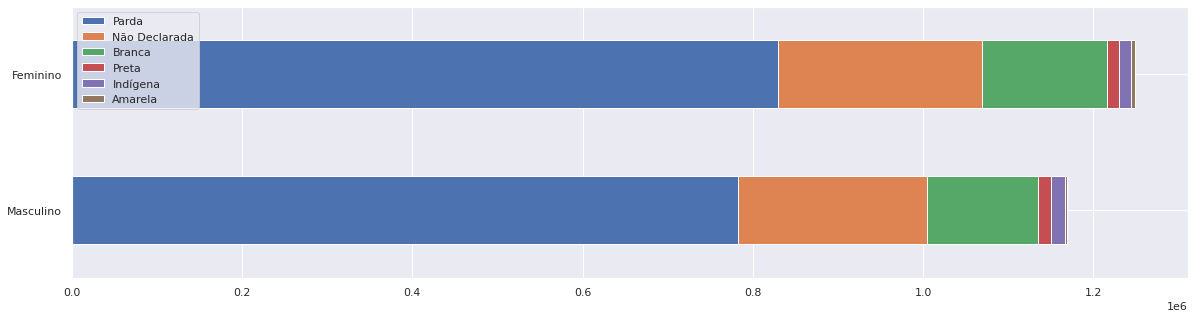

In [ ]:
grafico_barras('ds_raca')

**Modalidade de ensino (regular, profissional...)**

A maioria dos alunos encontram-se no ensino regular, seguida pela modalidade EJA e em terceiro lugar o ensino profissional**

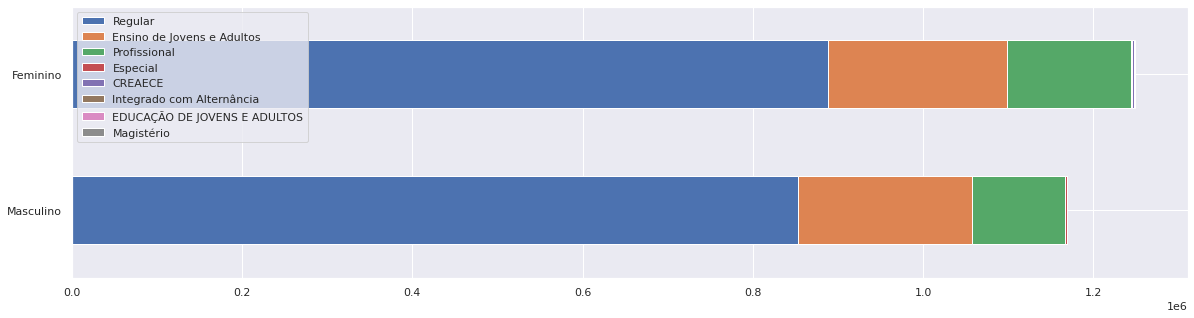

In [ ]:
grafico_barras('ds_modalidade')

**A escola regular é aquela que segue a educação comum, com os níveis de ensino e faixas etárias estabelecidas. O que é a modalidade de ensino EJA?
O que é EJA? EJA é a sigla de Educação de Jovens e Adultos, uma modalidade de ensino destinada ao público que não completou, abandonou ou não teve acesso à educação formal na idade apropriada. A EJA é popularmente conhecida como supletivo. O que é ensino médio profissional?
São cursos que se integram à organização curricular de uma Habilitação Profissional Técnica de Nível Médio (curso técnico), compondo o respectivo itinerário formativo aprovado pelo sistema de ensino.**

**Série que o aluno está cursando**

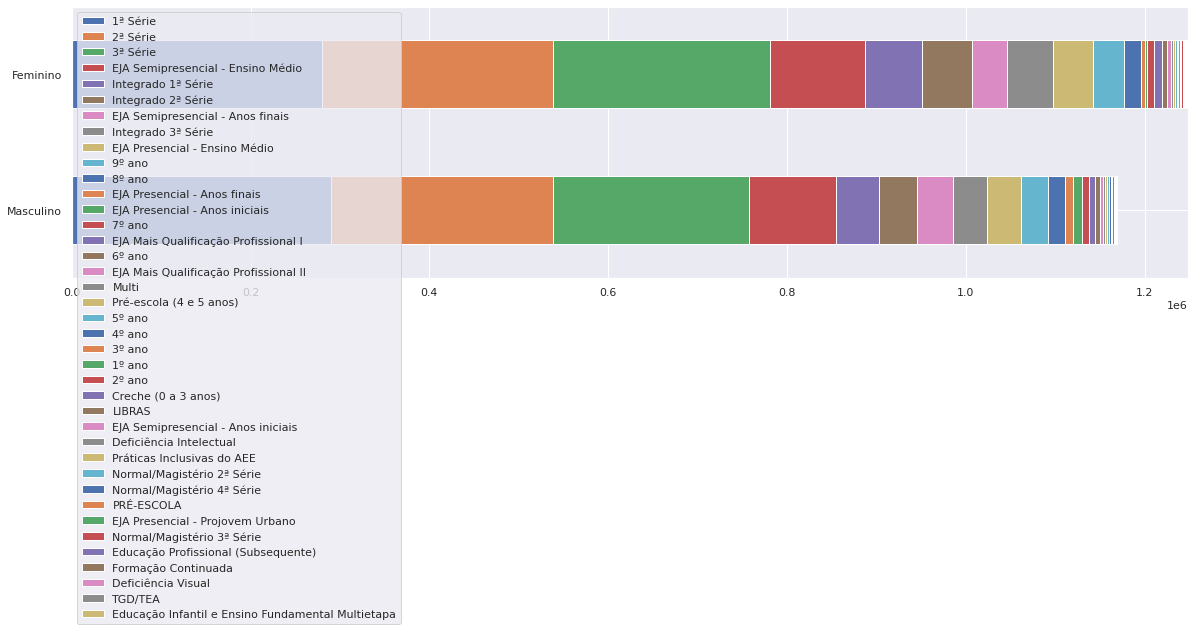

In [ ]:
grafico_barras('ds_etapa')

**Alunos por série**

In [ ]:
dados_alunos['ds_etapa'].value_counts()

1ª Série                                             570247
2ª Série                                             506264
3ª Série                                             462786
EJA Semipresencial - Ensino Médio                    203963
Integrado 1ª Série                                   110322
Integrado 2ª Série                                    98582
Integrado 3ª Série                                    89573
EJA Presencial - Ensino Médio                         83416
EJA Semipresencial - Anos finais                      79685
9º ano                                                63811
8º ano                                                38478
7º ano                                                17215
EJA Mais Qualificação Profissional I                  14910
EJA Presencial - Anos finais                          13313
EJA Presencial - Anos iniciais                        11489
6º ano                                                10709
EJA Mais Qualificação Profissional II   

In [ ]:
aluno = dados_alunos[['ds_sexo', 'ds_etapa']]

In [ ]:
aluno.head()

,ds_sexo,ds_etapa
0,Feminino,1ª Série
1,Masculino,1ª Série
2,Masculino,1ª Série
3,Masculino,1ª Série
4,Feminino,1ª Série


**Tabela com alunos por série**

In [ ]:
aluno.groupby("ds_etapa").count()



,ds_sexo
ds_etapa,
1ª Série,570247
1º ano,3253
2ª Série,506264
2º ano,3215
3ª Série,462786
3º ano,3487
4º ano,3580
5º ano,3881
6º ano,10709


**A maior parte dos alunos estudam nos períodos de manhã ou tarde**

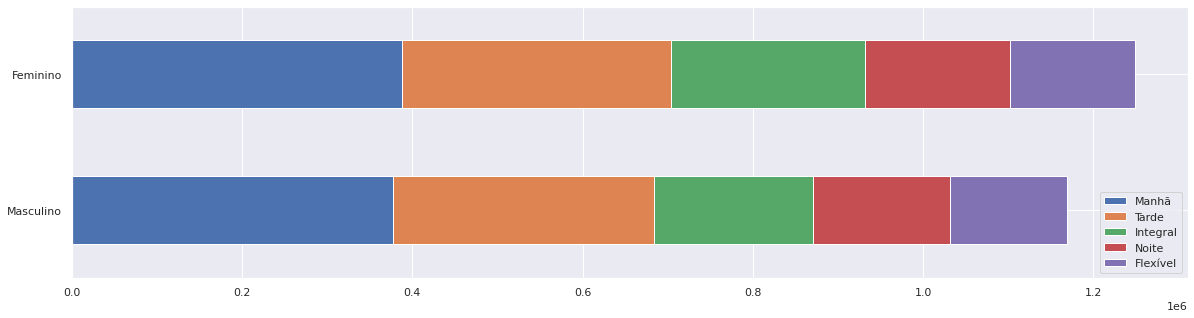

In [ ]:
grafico_barras('ds_turno')

**Quantidade de alunos por escola**

In [ ]:
escola_alunos =dados_alunos[['ds_sexo', 'nm_escola']]

In [ ]:
escola_alunos.groupby("nm_escola").count()



,ds_sexo
nm_escola,
ADOLFO FERREIRA DE SOUSA EEEP,2212
ALMIR PINTO EEM,8956
ANTONIA NEDINA ONOFRE DE PAIVA - EEEP,2248
CAIC RAIMUNDO GOMES DE CARVALHO,5859
CAIC SENADOR CARLOS JEREISSATI,5489
...,...
RAIMUNDA SILVEIRA DE SOUZA CARNEIRO EEM,1344
RAIMUNDO ADJACIR CIDRÃO DE OLIVEIRA EEM,789
VEREADORA EDIMAR MARTINS DA CUNHA EEM,810


**Alunos por categoria de ensino** 

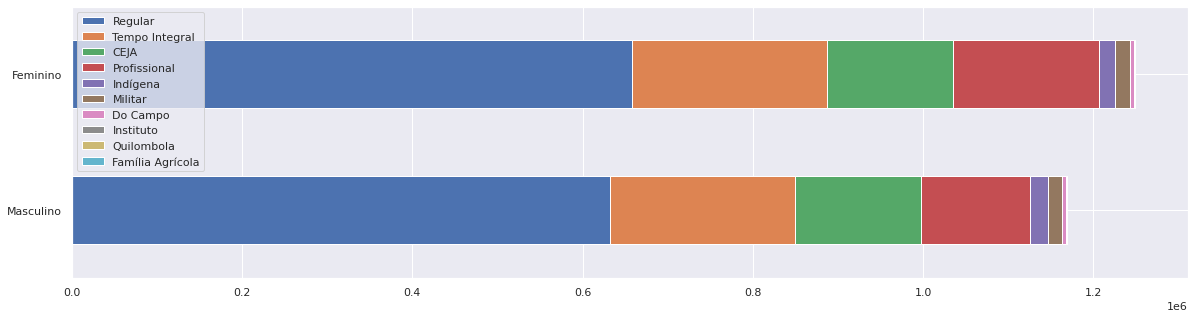

In [ ]:
grafico_barras('nm_categoria')

**Alunos por nível de ensino**

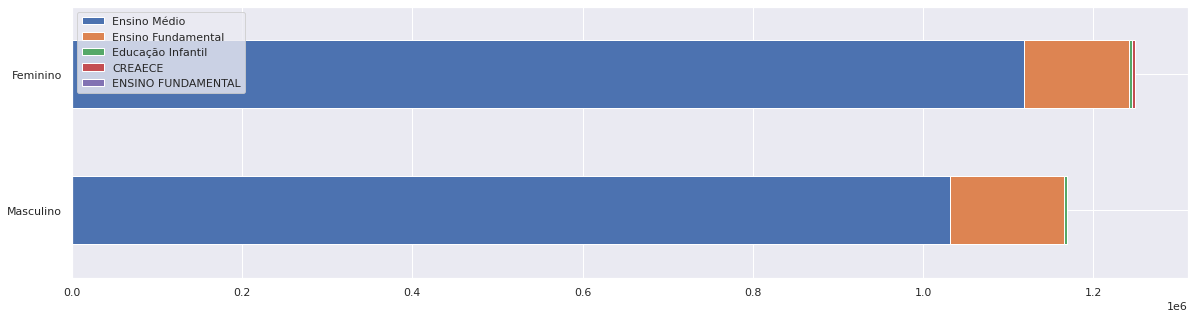

In [ ]:
grafico_barras('ds_nivel')

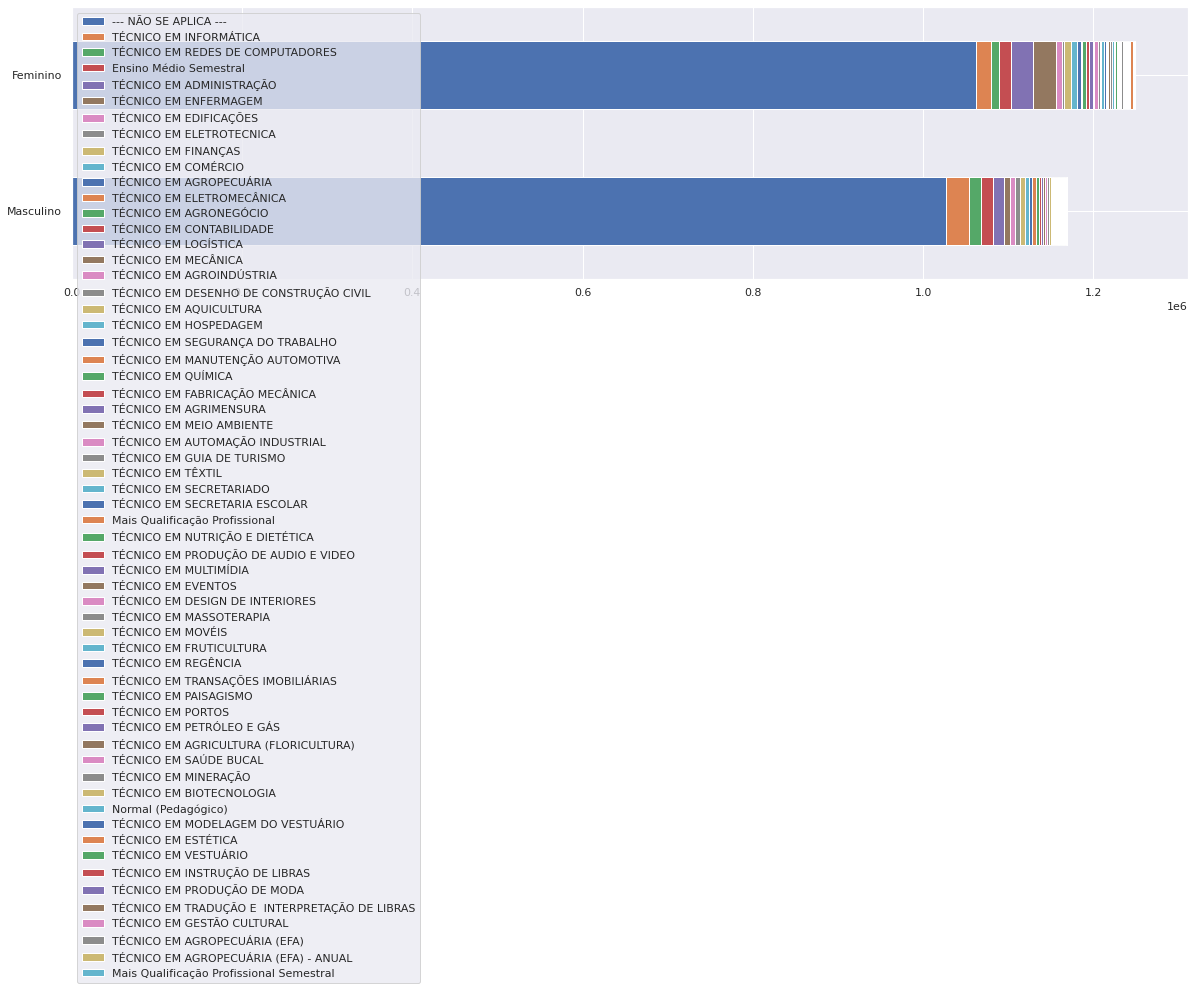

In [ ]:
grafico_barras('nm_curso')

In [ ]:
dados_alunos['nm_curso'].value_counts()

--- NÃO SE APLICA ---                             2089463
TÉCNICO EM INFORMÁTICA                              44066
TÉCNICO EM ADMINISTRAÇÃO                            39214
TÉCNICO EM ENFERMAGEM                               34313
Ensino Médio Semestral                              26850
TÉCNICO EM REDES DE COMPUTADORES                    24089
TÉCNICO EM FINANÇAS                                 14028
TÉCNICO EM EDIFICAÇÕES                              12857
TÉCNICO EM COMÉRCIO                                 11439
TÉCNICO EM ELETROTECNICA                             8703
TÉCNICO EM AGROPECUÁRIA                              8658
TÉCNICO EM AGRONEGÓCIO                               7929
TÉCNICO EM LOGÍSTICA                                 7412
TÉCNICO EM AGROINDÚSTRIA                             6460
TÉCNICO EM CONTABILIDADE                             6019
TÉCNICO EM ELETROMECÂNICA                            5491
TÉCNICO EM HOSPEDAGEM                                5177
TÉCNICO EM DES

**Alunos por CREDE da escola**

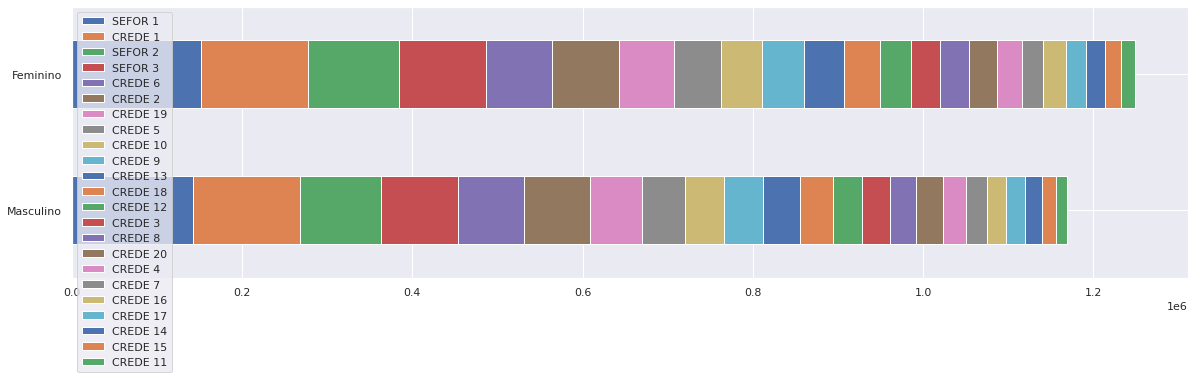

In [ ]:
grafico_barras('nm_crede_sefor')

**Quantidade de alunos por município**

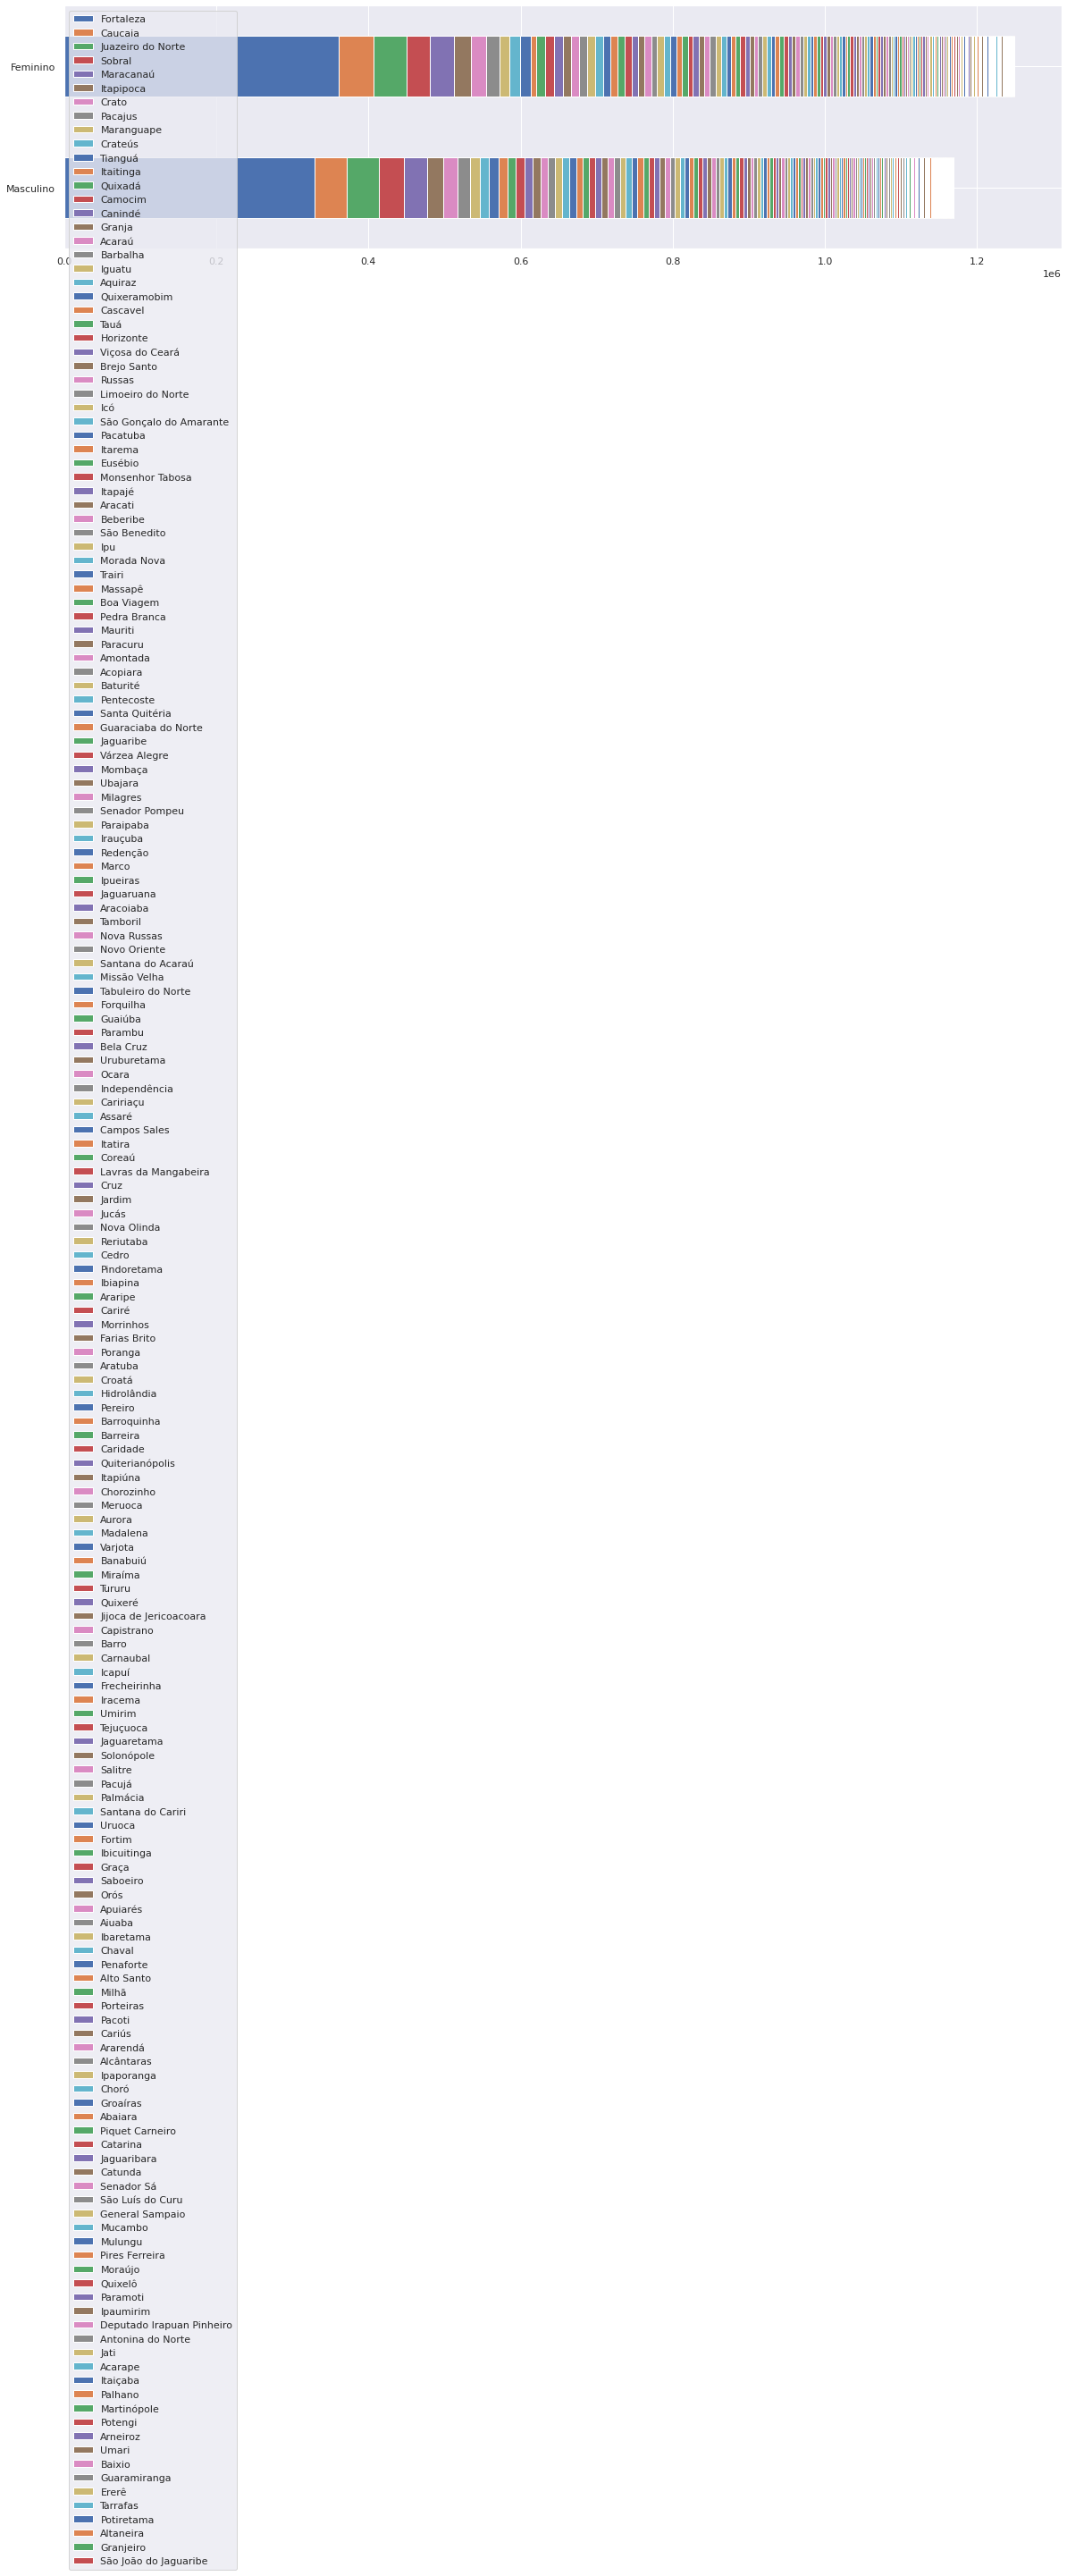

In [ ]:
grafico_barras('nm_municipio')